In [9]:
import sys
sys.path.append("../../")
from src.utils.lagged_price_features.arima_train_eval import (
    get_sorted_split_dirs,
    train_plot_preds_from_split_dir,
    calculate_mape,
    create_train_test_df_from_split_dir,
    plot_mape_for_split_indices,
)

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [10]:
time_series_split_dir = "../../data/lagged_price_features/time_series_split"
split_dirs = get_sorted_split_dirs(time_series_split_dir)

In [11]:
train, test = create_train_test_df_from_split_dir(split_dirs[0])

In [12]:
FREQ = "h"
SEASON_LENGTH = 24

sf = StatsForecast(
    models=[AutoARIMA(season_length=SEASON_LENGTH)],
    freq=FREQ,
)

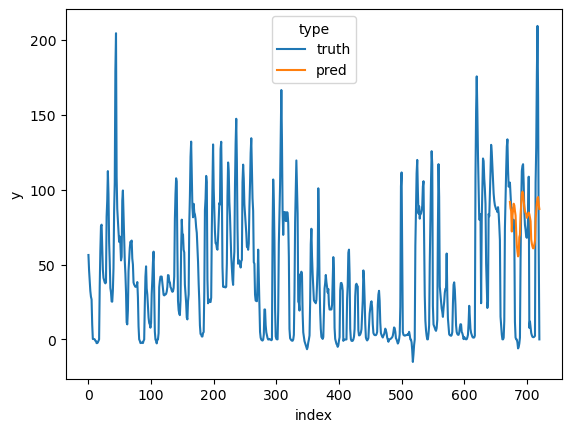

In [13]:
# exogenous_features = ["lag_24h"]
exogenous_features = None

pred = train_plot_preds_from_split_dir(
    sf=sf, split_dir=split_dirs[0], exogenous_features=exogenous_features
)

In [14]:
mape = calculate_mape(
    split_dirs=split_dirs,
    sf = StatsForecast(
        models=[AutoARIMA(season_length=SEASON_LENGTH)],
        freq=FREQ,
    ),
)
mape

Evaluating split ../../data/lagged_price_features/time_series_split/0
Evaluating split ../../data/lagged_price_features/time_series_split/1
Evaluating split ../../data/lagged_price_features/time_series_split/2
Evaluating split ../../data/lagged_price_features/time_series_split/3
Evaluating split ../../data/lagged_price_features/time_series_split/4
Evaluating split ../../data/lagged_price_features/time_series_split/5
Evaluating split ../../data/lagged_price_features/time_series_split/6
Evaluating split ../../data/lagged_price_features/time_series_split/7
Evaluating split ../../data/lagged_price_features/time_series_split/8
Evaluating split ../../data/lagged_price_features/time_series_split/9
Evaluating split ../../data/lagged_price_features/time_series_split/10
Evaluating split ../../data/lagged_price_features/time_series_split/11
Evaluating split ../../data/lagged_price_features/time_series_split/12
Evaluating split ../../data/lagged_price_features/time_series_split/13
Evaluating split

[np.float64(6758043466404427.0),
 np.float64(7.431740349590231),
 np.float64(3.2983107001889618),
 np.float64(9846198992725848.0),
 np.float64(3.9724167054552324),
 np.float64(7.470165523722656),
 np.float64(1.8403408612068475),
 np.float64(16.810864416504938),
 np.float64(0.7594558966505826),
 np.float64(0.35884013657118174),
 np.float64(1.1198418342896414e+16),
 np.float64(0.6131843385304672),
 np.float64(1.941099876624585),
 np.float64(8365764119816021.0),
 np.float64(14.251422260066027),
 np.float64(0.5623242496853349),
 np.float64(104.07554880370269),
 np.float64(1.4179246909057778e+16),
 np.float64(0.5062898719058102),
 np.float64(8080013261038769.0),
 np.float64(182.2672114867287),
 np.float64(7.302719600880681),
 np.float64(0.4333237865437663),
 np.float64(0.28995144180618726)]

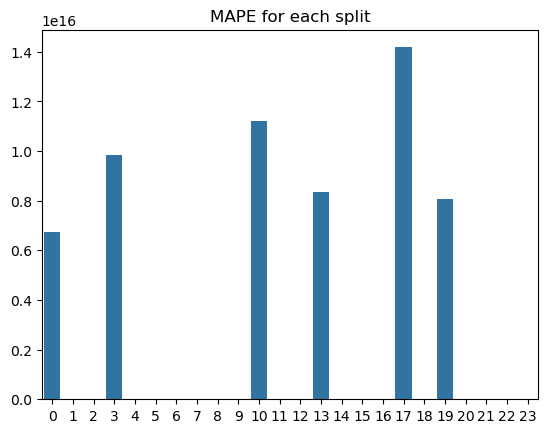

In [15]:
plot_mape_for_split_indices(split_dirs, mape)